# Mandatory Assignment 1

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Sunday, August 19, 2018.**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Must I hand-in as a group?: **yes**

The assigment consist of one to three problems from each of the exercise sets you have solved so far (excluding Exercise Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

## Problems from Exercise Set 2:

> **Ex. 2.2**: Make two lists. The first should be numbered. The second should be unnumbered and contain at least one sublevel. 

# [Answer to Ex. 2.2 here] (convert to markdown cell)

1. Fruits
2. Vegetables 
3. Meet


- Fruits
- Vegetables
- Meet
    - Chicken




## Problems from Exercise set 3:

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [1]:
# [Answer to Ex. 3.1.3 here]
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']

l2= [l1[i] for i in (1,2,4,5)]
l2.insert(1,"r")
print(l2)
' '.join(l2) 

['Is', 'r', '>', 'g ', '?']


'Is r > g  ?'

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [3]:
# [Answer to Ex. 3.1.4 here]
my_dict={} #Alternative co run my_dict=dict()

# Then add each of the words [] as a key, with the value being a boolean indicator 
#for whether the word begins with a vowel
keys = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']

def first_vowel(my_dict):
    if my_dict[0] in 'aeiou':
        return True 
    else: 
        return False 

for k in keys:
    my_dict[k] = first_vowel(k)
print(my_dict)

#Alternatively we could run it like this: 
EmptyDict = {}
Lyde = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise'] 
for element in Lyde:
    if  element[0] in 'aeiou':
        EmptyDict[element] = True
    else:
        EmptyDict[element] = False

{'animal': True, 'coffee': False, 'python': False, 'unit': True, 'knowledge': False, 'tread': False, 'arise': True}


> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.
>
>> _Hint:_ The `requests.response` object has a `.json()` method. 
>
>> _Note:_ you wrote `construct_link()` in 3.3.1, if you didn't heres the link you need to get: `https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*`

In [129]:
# [Answer to Ex. 3.3.2 here]
import requests
import json
import jsonstat
import pandas as pd
#url='https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?K%C3%98N=*&Tid=*'
#response=requests.get(url)
#response.ok

# This is the manually constructed link
'https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*'

# This function will do it for you
def construct_link(table_id, variables, sex):
    base = 'https://api.statbank.dk/v1/data/{id}/JSONSTAT?lang=en'.format(id = table_id)
    
    for var in variables:
        base += '&{v}'.format(v = var)
    for element in sex:
        base += '&{e}'.format(e = element)
    return base 

url=construct_link('FOD', ['Tid=*'], ['BARNKON=P'] )
#collection = jsonstat.from_url(url)
#print(collection)
response=requests.get(url).json()
print(pd.read_json(response))

#Vi kan ikke få et fornuftigt output, som i en dataframe. 
#Der er noget, som vi har overset eller ikke har fanget. Vi mistænker, at det er JSONSTAT formatet,
#som driller. 



ValueError: Invalid file path or buffer object type: <class 'dict'>

## Problems from exercise set 4


In [4]:
import numpy as np
import pandas as pd

> **Ex. 4.1.1:** Use Pandas' CSV reader to fetch  daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/). 
>
>> *Hint 1*: for compressed files you may need to specify the keyword `compression`.
>
>> *Hint 2*: keyword `header` can be specified as the CSV has no column names.
>
>> *Hint 3*: Specify the path, as the URL linking directly to the 1864 file. 

In [6]:
# [Answer to Ex. 4.1.1 here] 


url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df = pd.read_csv(url, compression='gzip', header = None)
df.head(3)




,station,date,observation,mesurement,5,6,7,8
0,ITE00100550,18640101,TMAX,10,NaN,NaN,E,NaN
1,ITE00100550,18640101,TMIN,-23,NaN,NaN,E,NaN
2,ITE00100550,18640101,PRCP,25,NaN,NaN,E,NaN
3,ASN00079028,18640101,PRCP,0,NaN,NaN,a,NaN
4,USC00064757,18640101,PRCP,119,NaN,NaN,F,NaN


> **Ex. 4.1.2:** Structure your weather DataFrame by using only the relevant columns (station identifier, data, observation type, observation value), rename them. Make sure observations are correctly formated (how many decimals should we add? one?).
>
>> *Hint:* rename can be done with `df.columns=COLS` where `COLS` is a list of column names.

In [22]:
# [Answer to Ex. 4.1.2 here] 
cols = ['station', 'date', 'observation', 'measurement', '5', '6', '7', '8']
df.columns = cols
df.head()
#the last columns are just called 5,6,7,8 because we can't figure out what they represent. 

,station,date,observation,measurement,5,6,7,8
0,ITE00100550,18640101,TMAX,10,NaN,NaN,E,NaN
75,ITE00100550,18640102,TMAX,8,NaN,NaN,E,NaN
152,ITE00100550,18640103,TMAX,-28,NaN,NaN,E,NaN
227,ITE00100550,18640104,TMAX,0,NaN,NaN,E,NaN
305,ITE00100550,18640105,TMAX,-19,NaN,NaN,E,NaN


> **Ex. 4.1.3:**  Select data for the station `ITE00100550` and only observations for maximal temperature. Make a copy of the DataFrame. Explain in a one or two sentences how copying works.
>
>> *Hint 1*: the `&` operator works elementwise on boolean series (like `and` in core python).
>
>> *Hint 2*: copying of the dataframe is done with the `copy` method for DataFrames.

In [23]:
# [Answer to Ex. 4.1.3 here]
df=df[(df['station']=='ITE00100550') & (df['observation']=='TMAX')]   
df_copy=df.copy(deep=True)
print(df_copy.head(3))
#If you don't use the copy method, then you will change the original dataset. 
#The two dataframes will share the same dataset if you don't use the copy. 

         station      date observation  measurement    5    6  7   8
0    ITE00100550  18640101        TMAX           10  NaN  NaN  E NaN
75   ITE00100550  18640102        TMAX            8  NaN  NaN  E NaN
152  ITE00100550  18640103        TMAX          -28  NaN  NaN  E NaN


> **Ex. 4.1.4:** Make a new column called `TMAX_F` where you have converted the temperature variables to Fahrenheit. 
>
>> *Hint*: Conversion is $F = 32 + 1.8*C$ where $F$ is Fahrenheit and $C$ is Celsius.

In [68]:
# [Answer to Ex. 4.1.4 here]
df_copy['TMAX_F'] = df_copy['measurement']*(1.8)+32 #Solution 1
df_copy["TMAX_F"] =  df_copy.apply(lambda x: 32 + 1.8 * x["measurement"], axis = 1)#Solution 2 
df_copy["date"] = df_copy["date"].apply(lambda x: pd.to_datetime(str(x), format = "%Y%m%d"))
df_copy["month"] = df_copy["date"].dt.month


## Problems from exercise set 5

In [26]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

> **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


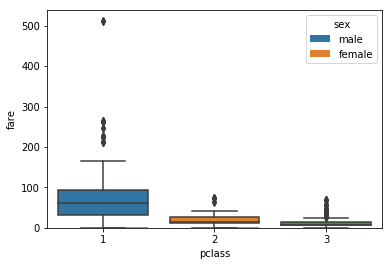

In [28]:
# [Answer to Ex. 5.1.1 here]
print(titanic.head(5))
#This dataset contains data about the survival for different groups of passengers. 
#Among the data are sex, class and fareprices.   
sns.barplot(x='class', y='survived', hue = 'sex', data = titanic)

# No we cannot make a boxplot, a boxplot need a categorical and a numerical variable

#Bonus
sns.boxplot(x='pclass', y='fare', data = titanic)

> **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


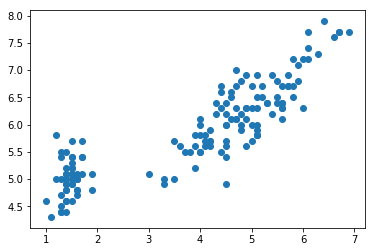

[Text(0,0.5,'Sepal Length'),
 Text(0.5,0,'Petal Lenght'),
 Text(0.5,1,'Length: Petal vs Sepal')]

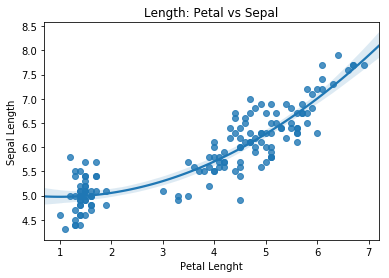

In [29]:
# [Answer to Ex. 5.1.2 here]
print(iris.head(5))
# You can do it with Matplot
plt.scatter(x=iris['petal_length'], y=iris['sepal_length'])
plt.show()
# But looks nicer with Seaborn
ax = sns.regplot(x='petal_length', y= 'sepal_length', order = 2, data = iris)
ax.set(xlabel = 'Petal Lenght', ylabel= 'Sepal Length', title= 'Length: Petal vs Sepal')

> **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

[Text(0,0.5,'Sepal Length'),
 Text(0.5,0,'Petal Lenght'),
 Text(0.5,1,'Length: Petal vs Sepal')]

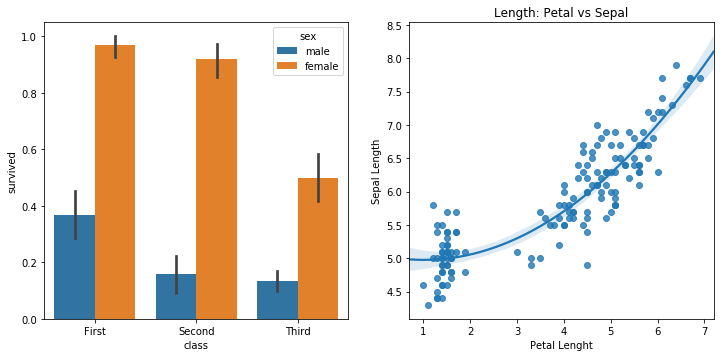

In [31]:
# [Answer to Ex. 5.1.3 here]
plt.figure(figsize=(12,12)) # Sets the figsize 
plt.subplot(2,2,1)
sns.barplot(x='class', y='survived', hue = 'sex', data = titanic)
plt.subplot(2,2,2)
ax = sns.regplot(x='petal_length', y= 'sepal_length', order = 2, data = iris)
ax.set(xlabel = 'Petal Lenght', ylabel= 'Sepal Length', title= 'Length: Petal vs Sepal')

> **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

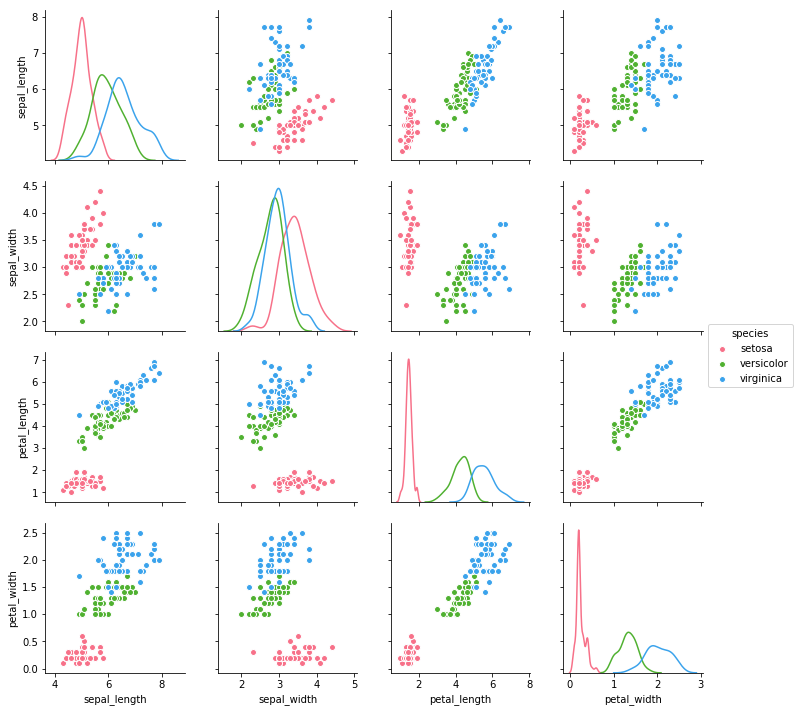

In [32]:
# [Answer to Ex. 5.1.4 here]
sns.pairplot(iris, hue = 'species', palette = 'husl', diag_kind="kde", diag_kws=dict(shade=False))

#sets colors using palette, at kde is the density function. 

#Bonus
#The diag_**kwargs means that you can use a dictionary style argument.  

## Problems from exercise set 6

> _Note:_ A central part of these exercises and the ones from exercise set 7 is downloading data from the NOAA servers. If you cannot complete this part, you can download the data as csv files **from [github](https://github.com/abjer/sds/tree/master/material/session_7)**.

In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.
>
>> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module.

In [48]:
# [Answer to Ex. 6.1.4]
#print(df_copy)
#df_copy['code']=df_copy['station'[:4]]
import re
Find = re.compile('\D\D\D?')
df_copy['NAT'] = df_copy['station'].apply(lambda x: re.search(Find, x).group())
print(df_copy)

#The \D means that the 3 first characters are letter. Have we used lower d then it would recognize
# it as digits - and the code would not work. Group betyder at den returnere en string. 

           station      date observation  measurement    5    6  7   8  \
0      ITE00100550  18640101        TMAX           10  NaN  NaN  E NaN   
75     ITE00100550  18640102        TMAX            8  NaN  NaN  E NaN   
152    ITE00100550  18640103        TMAX          -28  NaN  NaN  E NaN   
227    ITE00100550  18640104        TMAX            0  NaN  NaN  E NaN   
305    ITE00100550  18640105        TMAX          -19  NaN  NaN  E NaN   
383    ITE00100550  18640106        TMAX          -13  NaN  NaN  E NaN   
460    ITE00100550  18640107        TMAX           -4  NaN  NaN  E NaN   
538    ITE00100550  18640108        TMAX           13  NaN  NaN  E NaN   
618    ITE00100550  18640109        TMAX           13  NaN  NaN  E NaN   
695    ITE00100550  18640110        TMAX            6  NaN  NaN  E NaN   
770    ITE00100550  18640111        TMAX          -15  NaN  NaN  E NaN   
847    ITE00100550  18640112        TMAX          -25  NaN  NaN  E NaN   
924    ITE00100550  18640113        TM

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [63]:
# [Answer to Ex. 6.1.5] 

def DownloadWeatherData(year, lavdatakorrektioner = 1):#hvis lavdatakorrektioner = 0, så henter den rådata og forarbejder dem ikke.
    if isinstance(year, int) and len(str(year)) == 4: #kontrol af input
        basepath = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/"    
        url = basepath + str(year) + ".csv.gz"
        if lavdatakorrektioner == 1: #Løkke med datakorrektioner
            data = pd.read_csv(url, header = None)    
            data.columns = ["station", "date","observation", "measurement", "Snowfall", "SnowDepth", "OtherElements", "Stuff" ]
            data = data[data["observation"] == "TMAX"]
            data["TMAX_F"] =  data.apply(lambda x: 32 + 1.8 * x["measurement"], axis = 1)
            Find = re.compile('\D\D\D?')
            data['NAT'] = data['station'].apply(lambda x: re.search(Find, x).group())
            data.sort_values(by="TMAX_F", ascending = True)
            return data
        else: 
            data0 = pd.read_csv(url, header = None)
            return data0
    else:
        print("Not a valid year")
     

    
listeTilDataFrames = []
for x in range(1864,1868,1):
    DF = DownloadWeatherData(x, lavdatakorrektioner = 1)
    listeTilDataFrames.append(DF)

In [64]:
DownloadWeatherData(1864)

,station,date,observation,measurement,Snowfall,SnowDepth,OtherElements,Stuff,TMAX_F,NAT
0,ITE00100550,18640101,TMAX,10,NaN,NaN,E,NaN,50.0,ITE
8,ASN00086071,18640101,TMAX,214,NaN,NaN,a,NaN,417.2,ASN
15,CA006158350,18640101,TMAX,11,NaN,NaN,C,NaN,51.8,CA
24,EIE00101859,18640101,TMAX,94,NaN,NaN,E,NaN,201.2,EIE
28,BE000006447,18640101,TMAX,-23,NaN,NaN,I,NaN,-9.4,BE
34,GME00125218,18640101,TMAX,-81,NaN,NaN,E,NaN,-113.8,GME
39,EZE00100082,18640101,TMAX,-92,NaN,I,E,NaN,-133.6,EZE
42,ITE00100554,18640101,TMAX,17,NaN,NaN,E,NaN,62.6,ITE
47,ASN00066062,18640101,TMAX,244,NaN,NaN,a,NaN,471.2,ASN
53,AU000005901,18640101,TMAX,-50,NaN,NaN,E,NaN,-58.0,AU


## Problems from exercise set 7

> _Note:_ Once again if you haven't managed to download the data from NOAA, you can refer to the github repo to get csv-files containing the required data.

In [65]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

> **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864. 

> *Hint*: the method `describe` computes all these measures.

In [70]:
# [Answer to Ex. 7.1.1]
grupperet=df_copy[(df_copy['observation']=='TMAX')&(df_copy['station']=='ITE00100550')].groupby('month')
grupperet['measurement'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,31.0,-0.774194,30.646054,-63.0,-22.00,0.0,19.00,53.0
2,29.0,41.344828,30.316516,-18.0,15.00,44.0,68.00,84.0
3,31.0,122.000000,27.804076,79.0,100.50,121.0,141.50,180.0
4,30.0,162.433333,44.871989,63.0,144.25,162.5,184.00,251.0
5,31.0,214.709677,33.126217,140.0,195.00,211.0,238.00,270.0
6,30.0,266.700000,29.263547,204.0,251.00,274.0,285.00,313.0
7,31.0,293.870968,19.130677,254.0,284.50,298.0,309.00,325.0
8,31.0,289.225806,37.947077,210.0,264.50,293.0,316.00,348.0
9,30.0,241.033333,36.207718,180.0,215.00,233.5,268.00,299.0


> **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 

In [74]:
# [Answer to Ex. 7.1.2]
listeTilDataFrames = []
for x in range(1864,1868,1):
    DF = DownloadWeatherData(x, lavdatakorrektioner = 1) #Anvender tidligere defineret funktion
    listeTilDataFrames.append(DF)
    
WeatherDataFourYears = pd.concat(listeTilDataFrames)




> **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.  

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [75]:
# [Answer to Ex. 7.1.3]
WeatherStationData = pd.read_fwf("https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt", header = None)
WeatherStationData.columns = ['station', "Lon","Lat", "temp", "name", "somthing", "Stuff", "morestuff" ]


StationLocation = pd.merge(WeatherDataFourYears, WeatherStationData[["station","Lon","Lat"]],on = "station" , how = "left")


## Problems from exercise set 8

> **Ex. 8.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [77]:
# [Answer to Ex. 8.1.2]
import requests
import json
import pandas as pd
        
DagpengeURL = "https://job.jobnet.dk/CV/FindWork/Search"
response = requests.get(DagpengeURL)
response.ok
RTEXT = response.text
DICT = json.loads(RTEXT)

DICT.keys()
    
Frame = pd.DataFrame(DICT["JobPositionPostings"])






['https://job.jobnet.dk/CV/FindWork?Offset=4020&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=8360&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=8640&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=7100&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=9280&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=15600&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=4260&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=6240&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=9200&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=5880&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=4980&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=7580&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=860&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=13760&SortValue=BestMatch',
 'https://job.jobne

> **Ex. 8.1.3.:** Store and print the 'TotalResultCount' value for later use. Also create a dataframe from the 'JobPositionPostings' field in the json. 

In [ ]:
# [Answer to Ex. 8.1.3]TotalResultCount = DICT["TotalResultCount"]

# Offset (pageresults) goes up 20

def DagpengeData(y=0):
    urlliste = []
    if y == 0: #Per default it use best match. If y=1 it use creationdate. 
        for i in range(0,TotalResultCount, 20):
            url = "https://job.jobnet.dk/CV/FindWork?Offset={}&SortValue=BestMatch".format(i)

            urlliste.append(url)
    else:
        for i in range(0,TotalResultCount, 20):
            url = "https://job.jobnet.dk/CV/FindWork?Offset={}&SortValue=CreationDate".format(i)

            urlliste.append(url)
    return urlliste

test = DagpengeData()

import random
import time
random.sample(test, 20)

## Problems from exercise set 9

> **Ex. 9.2.1:** Load the data used in the exercise using the `pd.read_csv` function. (Hint: path to file can be both a url or systempath). 

>Define a variable `sample_string = '\n'.join(df.sample(2000).reviewBody)` as sample of all the reviews that you will practice on.  (Run it once in a while to get a new sample for potential differences).
Imagine we were a company wanting to find the reviews where customers are concerned with the price of a service. They decide to write a regular expression to match all reviews where a currencies and an amount is mentioned. 

In [78]:
# [Answer to Ex. 9.2.1]

import requests
url = 'https://raw.githubusercontent.com/snorreralund/explore_regex/master/explore_regex.py'
response = requests.get(url)
with open('explore_regex.py','w') as f:
    f.write(response.text)
import explore_regex as e_re

url='https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df=pd.read_csv(url)
print(df.head(3))

df.to_csv('danish_review_sample.csv',index=False) 
sample_string = '\n'.join(df.sample(2000).reviewBody)



   Unnamed: 0                                         __domain__  \
0      159770        https://trustpilot.com/review/www.exmed.net   
1      168724      https://trustpilot.com/review/mapscompany.com   
2       96443  https://trustpilot.com/review/www.thriftbooks.com   

   address_@type address_addressCountry address_addressLocality  \
0  PostalAddress                    NaN                  Fenton   
1  PostalAddress                    NaN        Petit-Rocher, NB   
2  PostalAddress                    NaN                 Tukwila   

  address_postalCode         address_streetAddress author_@type  \
0              63026              218 Seebold Spur       Person   
1            E8J 1E4             713 rue de la Mer       Person   
2              98188  18300 Cascade Ave S, Ste 150       Person   

          datePublished                    email        ...          \
0  2017-07-29T20:27:03Z          sales@exmed.net        ...           
1  2017-08-11T20:09:48Z  contact@mapscompany.co

> **Ex. 9.2.2:** 
> Write an expression that matches both the dollar-sign (\$) and dollar written literally, and the amount before or after a dollar-sign. Remember that the "$"-sign is a special character in regular expressions. Explore and refine using the explore_pattern function in the package I created called explore_regex. 
```python
import explore_regex as e_re
explore_regex = e_re.Explore_Regex(sample_string) # Initaizlie the Explore regex Class.
explore_regex.explore_pattern(pattern) # Use the .explore_pattern method.
```


Start with exploring the context around digits ("\d") in the data. 

In [79]:
# [Answer to Ex. 9.2.2]
import explore_regex as e_re
%matplotlib inline

# money example

explore_regex = e_re.ExploreRegex(sample_string)
pattern1 = "\d? + ?\$|dollar?"
pattern2="\d"
pattern3="\$"

patterns=[pattern1, pattern2,pattern3]
explore_regex.explore_pattern(pattern1)#Use the explore pattern method

for pattern in patterns:
    explore_regex.explore_difference(pattern,patterns[0])


------ Pattern: \d? + ?\$|dollar?	 Matched 81 patterns -----
Match:  $	Context: was about $80 to unlo
Match:  $	Context:ly cost me $0.90 in eB
Match:  $	Context:rders over $10. I will
Match:  $	Context:5 feet for $1,284.  Th
Match:  $	Context:se. I lose $2400,  but
Match:  $	Context: for extra $10 per boo
Match:  $	Context:elling for $10 less th
Match:  $	Context:additional $63 USA. Th
Match: dollar	Context:s to like dollars more for
Match:  $	Context: more than $400 instea
Found 0 overlaps between the expressions:

        pattern1: \d? + ?\$|dollar? 	 and

        pattern2: \d? + ?\$|dollar?

        81 included in pattern1 and not in the pattern2

        81 was included in pattern2 and not in pattern1
------ Pattern: \d	 Matched 1265 patterns -----
Found 2 overlaps between the expressions:

        pattern1: \d 	 and

        pattern2: \d? + ?\$|dollar?

        1264 included in pattern1 and not in the pattern2

        80 was included in pattern2 and not in pattern1
------ Pattern

> **Ex.9.2.3** Use the .report() method. e_re.report(), and print the all patterns in the development process using the .pattern method - i.e. e_re.patterns 

------ Pattern: \d? + ?\$|dollar?	 Matched 81 patterns -----
------ Pattern: \d	 Matched 1265 patterns -----
------ Pattern: \$	 Matched 84 patterns -----


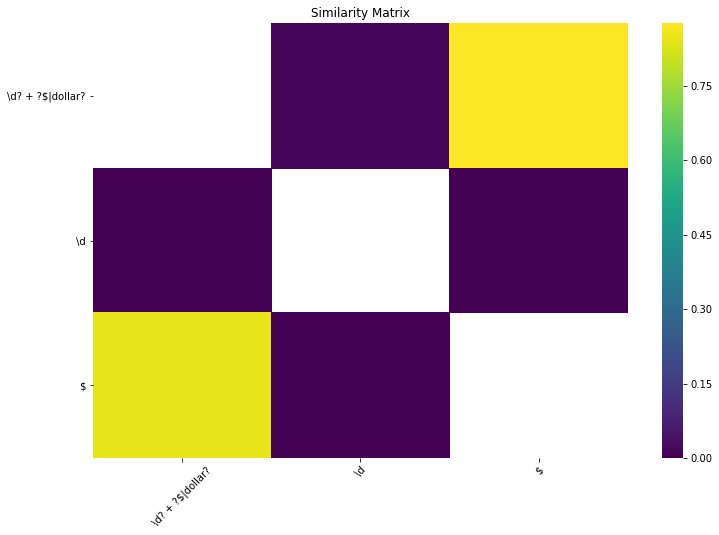

In [80]:
# [Answer to Ex. 9.2.3]
explore_regex.report('soft')